# **Movie Recommender Systems**

Anuj Rawat <br>
Btech CSE <br>
6th SEM <br>
18141458

Collection of data has led to a new era of information.It is being used to build creative system and this is where Recommendation Systems come into play.
Recommendation Systems are information filtering systems they provides items that are more relevant to the search item or are realted to the search history of the user.  


Companies like Amazon Prime and Spotify  depend highly on the effectiveness of their recommendation system for their business and suceess.

We will be building Movie Recommendation System 

There will be 2 recommender systems example:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.



> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

Start

In [12]:
#importing the required library
import pandas as pd 
import numpy as np 

In [13]:
#importing the dataset and assigning it to variables
credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [14]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [15]:
#watching starting 2 rows in dataset
credits_df.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


The credit dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - Actors in movie.
* crew - The name of Director, Editor, Composer, Writer etc.

The movies dataset has the following features:- 

* budget - Making cost.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - link to the homepage of movie.
* id - A unique identifier for each movie.
* keywords - The keywords or tags related to the movie.
* original_language - language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.


In [16]:
# changing- the column name from movie_id to id

credits_df.columns = ['id','tittle','cast','crew']

In [17]:
# merging the two data frame on id column

movies_df= movies_df.merge(credits_df,on='id')

In [18]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Data Preprosessing

In [19]:
#droping the column which are un-required

movies_df = movies_df.drop(columns=['budget','homepage', 'status','production_countries'])
movies_df = movies_df.drop(columns=['original_language', 'runtime'])

In [20]:
movies_df.head(2)

,genres,id,keywords,original_title,overview,popularity,production_companies,release_date,revenue,spoken_languages,tagline,title,vote_average,vote_count,tittle,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## **Demographic Filtering** -
   
* 1. We need a metric/parameter to score or rate movie 
* 2. Calculate the score for every movie 
* 3. Sort the scores and recommend the best rated movie to the users.


IMDB's weighted rating (wr) formula : 

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v : the number of votes for the movie
* m : the minimum votes required to be listed in the chart
* R : the average rating of the movie
* C : the mean of all vote across the whole report

We have v as **vote_count** and
        R as **vote_average**

Note : Average ratings of the movie is not good to pick as a parameter because if a movie have 1 review of full rating then its        Average rating will be highest

In [21]:
C = movies_df['vote_average'].mean()
C
#the mean rating for all the movies is approx 6 on a scale of 10

6.092171559442011

In [22]:
# Determine an appropriate value for m, the minimum votes required to be listed in the chart
# We will use 90th percentile as our cutoff
# for a movie to feature in the charts, it must have more votes than at least 90%ile of the movies in the list.

m = movies_df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [23]:
#                               vote_count row having vote > m from movies dataframe  will only to the chart

top_movies_chart = movies_df.copy().loc[movies_df['vote_count'] >= m]
top_movies_chart.shape

(481, 17)

In [24]:
# We see that there are 481 movies which qualify to be in this list
# Now, we need to calculate our metric for each qualified movie.
# We will define a function, weighted_rating() and define a new feature score
# we'll calculate the value by applying this function to our DataFrame of qualified movies
top_movies_chart.head(2)

,genres,id,keywords,original_title,overview,popularity,production_companies,release_date,revenue,spoken_languages,tagline,title,vote_average,vote_count,tittle,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [25]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [26]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`

top_movies_chart['score'] = top_movies_chart.apply(weighted_rating, axis=1)

# Finally, let's sort the DataFrame (chart) based on the score feature
# output the title, vote count, vote average and weighted rating or score of the top 10 movies

In [27]:
#Sort movies based on score calculated above
top_movies_chart = top_movies_chart.sort_values('score', ascending=False)


In [28]:

#Print the top 10 movies
top_movies_chart[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


We have made our first simple recommender. 
It is can be used in  Trending tab of youtube, by these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

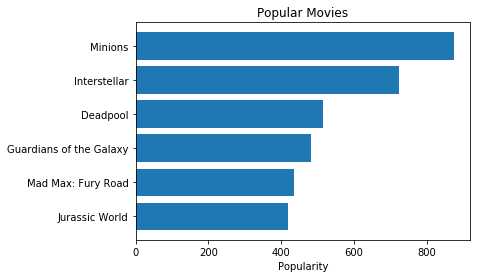

In [29]:
popularity_chart = movies_df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt

# bar plot(x,y)
plt.barh( popularity_chart['title'].head(6), popularity_chart['popularity'].head(6) )

plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


These demographic recommender provide a general chart of recommended movies to all the users.
They are not sensitive to the interests of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering.
This uses the search history of the user to give recommendation

# **Content Based Filtering**
Recommender system, recommends on the basis the content in the movie like overview, cast, crew, keyword, tagline etc.<br>
It i used to find its similarity with other movies ans then the movies that are most likely to be similar are recommended.



## **Summary / Overview / description based Recommender**

Calculating pairwise similarity scores for all movies based on their plot descriptions <br>
Recommend movies based on that similarity score.<br>
The plot / summary / Overview / description is given in the **overview** feature(column) of our dataset.  

In [30]:
movies_df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Need to make the word vector of each overview.
Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Term frequency = (No of repeated word in sentence/No of word in the sentence) <br>
Inverse Document Frequency = log(No of sentence/No of sentence containing word) <br>

Create TF vector and IDF vector and multiply then to get tfTdf vector

The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Scikit-learn have a built-in TfIdfVectorizer class that produces the TF-IDF matrix 

In [31]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies_df['overview'] = movies_df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

In [32]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

(r,c) <br>
r = movie<br>
c = word to describe it <br>
20K different words were used to describe the 4800 movies in our dataset.


With this Tdidf matrix we can now compute a similarity score.<br>

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
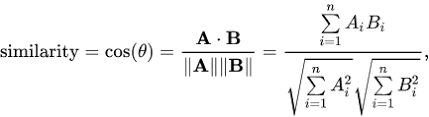

In [33]:
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Createing a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.<br>
Require a reverse mapping of movie titles and DataFrame indices.<br>Need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [34]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

Define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [35]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

In [36]:
get_recommendations('Superman')

870                          Superman II
10                      Superman Returns
2433    Superman IV: The Quest for Peace
914                 Central Intelligence
4659                          Horse Camp
2527         National Lampoon's Vacation
3542                                R100
45                           World War Z
1368                      Identity Thief
1237                  The Out-of-Towners
Name: title, dtype: object

In [37]:
get_recommendations('Need for Speed')

225                                 Speed Racer
1137                          One for the Money
99                     The Fast and the Furious
2274                                   Survivor
4727                               Penitentiary
2868                                   Fortress
1418    Midnight in the Garden of Good and Evil
976                            Escape from L.A.
3765                         Let's Go to Prison
1014                                   Rat Race
Name: title, dtype: object

## **Keywords, Credit and Genre Based Recommender**
A recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie.<br>Data is present in the form of "stringified" lists , convert it into a safe and usable structure

In [38]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

Functions that will help us to extract the required information from each feature.

In [39]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [40]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [41]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies_df['director'] = movies_df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [42]:
# Print the new features of the first 3 films
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them.<br> This is done so that our vectorizer doesn't count the X of "X Y" and "X Z" as the same.

In [43]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [44]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [45]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies_df['soup'] = movies_df.apply(create_soup, axis=1)


The next steps are similar to plot description based recommender.<br>
Only important difference is that we use the **CountVectorizer()** instead of TF-IDF.Because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [46]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df['soup'])

In [47]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [48]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

Use same get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

In [49]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [50]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

Our recommender has been successful in capturing more information due to more metadata and give recommendations.